# Gradient Descent Intro
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.3972,  0.4409,  0.2642,  0.9795,  0.525 ,  0.5604,  0.377 ,  0.2615,  0.8074,  0.1432,
        0.9611,  0.2831,  0.6601,  0.3446,  0.4784,  0.5288,  0.6852,  0.1585,  0.1217,  0.7688,
        0.5391,  0.2149,  0.1422,  0.6786,  0.7742,  0.9304,  0.7472,  0.1283,  0.8174,  0.463 ])

In [6]:
y

array([  9.1916,   9.3226,   8.7925,  10.9384,   9.575 ,   9.6813,   9.131 ,   8.7844,  10.4222,
         8.4297,  10.8832,   8.8494,   9.9802,   9.0337,   9.4352,   9.5863,  10.0556,   8.4755,
         8.365 ,  10.3064,   9.6172,   8.6446,   8.4265,  10.0359,  10.3227,  10.7913,  10.2415,
         8.385 ,  10.4522,   9.3889])

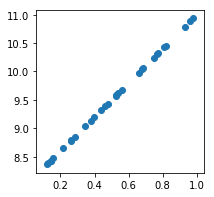

In [7]:
plt.scatter(x,y)

In [21]:
# sum of square error
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [22]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.0854

In [23]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [24]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x*dydb

    # update our weights by moving in direction of steepest descent
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [25]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani